In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [3]:
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv('../data/pima-indians-diabetes.csv', header=None)
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dataset.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [5]:
dataset[8].unique()

array([1, 0], dtype=int64)

In [6]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

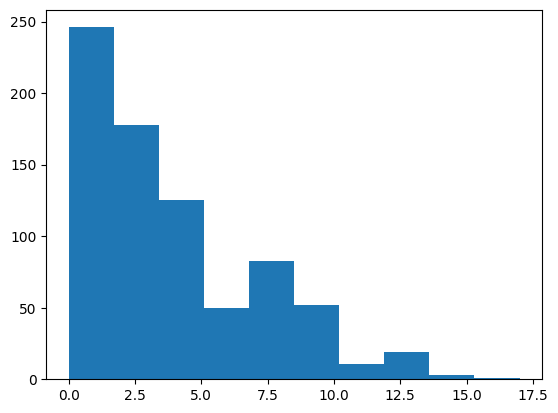

In [7]:
import matplotlib.pyplot as plt
plt.hist(X[0])

In [8]:
# explore the scaling range of the robust scaler transform

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
# define dataset
# get the models to evaluate
model = KNeighborsClassifier()
# evaluate the model
scores = evaluate_model(model, X, y)

In [9]:
scores

array([0.75324675, 0.7012987 , 0.67532468, 0.76623377, 0.74025974,
       0.80519481, 0.71428571, 0.7012987 , 0.72368421, 0.68421053,
       0.64935065, 0.67532468, 0.68831169, 0.75324675, 0.7012987 ,
       0.74025974, 0.64935065, 0.76623377, 0.75      , 0.73684211,
       0.71428571, 0.64935065, 0.68831169, 0.7012987 , 0.75324675,
       0.7012987 , 0.7012987 , 0.77922078, 0.76315789, 0.69736842])

In [10]:
mean(scores)

0.7174698108908635

### MinMaxScaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(X)
scaled1 = scaler1.transform(X)
scores1 = evaluate_model(model, scaled1, y)
mean(scores1)

0.7379072681704262

### StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaler2.fit(X)
scaled2 = scaler2.transform(X)
scores2 = evaluate_model(model, scaled2, y)
mean(scores2)

0.7387787650945546

### RobustScaler

In [13]:
from sklearn.preprocessing import RobustScaler

scaler3 = RobustScaler()
scaler3.fit(X)
scaled3 = scaler3.transform(X)
scores3 = evaluate_model(model, scaled3, y)
mean(scores3)

0.7335269993164731

### Yeo-Johnson Transformation

In [14]:
from sklearn.preprocessing import PowerTransformer

scaler4 = PowerTransformer(method='yeo-johnson', standardize=True)
scaler4.fit(X)
scaled4 = scaler4.transform(X)
scores4 = evaluate_model(model, scaled4, y)
mean(scores4)

0.7478184096605148

### Save Transformation as PKL file

In [15]:
from pickle import dump

dump(scaler4, open('scaler.pkl', 'wb'))